In [60]:
import matplotlib.pyplot as plt
import numpy as np
from keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [61]:
sentences = [
    "The future king is the prince",
    "Daughter is the princess",
    "Son is the prince",
    "Only a man can be a king",
    "Only a woman can be a queen",
    "The princess will be a queen",
    "Queen and king rule the realm",
    "The prince is a strong man",
    "The princess is a beautiful woman",
    "The royal family is the king and queen and their children",
    "Prince is only a boy now",
    "A boy will be a man"
]

In [62]:
def text_preprocessing(
        text: list,
        punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
        stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
) -> list:
    processed_text = []
    for sentence in text:
        # Remove punctuations
        no_punct = "".join([char for char in sentence if char not in punctuations])
        # Convert to lowercase and split into words
        words = no_punct.lower().split()
        # Remove stop words
        no_stop_words = " ".join([word for word in words if word not in stop_words])
        processed_text.append(no_stop_words)
    return processed_text

In [63]:
sentences = text_preprocessing(sentences)
sentences

['future king prince',
 'daughter princess',
 'son prince',
 'only man can king',
 'only woman can queen',
 'princess queen',
 'queen king rule realm',
 'prince strong man',
 'princess beautiful woman',
 'royal family king queen their children',
 'prince only boy now',
 'boy man']

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

sequences

[[10, 1, 2],
 [11, 4],
 [12, 2],
 [5, 6, 7, 1],
 [5, 8, 7, 3],
 [4, 3],
 [3, 1, 13, 14],
 [2, 15, 6],
 [4, 16, 8],
 [17, 18, 1, 3, 19, 20],
 [2, 5, 9, 21],
 [9, 6]]

In [65]:
bigrams = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        bigrams.append([sequence[i - 1], sequence[i]])

bigrams

[[10, 1],
 [1, 2],
 [11, 4],
 [12, 2],
 [5, 6],
 [6, 7],
 [7, 1],
 [5, 8],
 [8, 7],
 [7, 3],
 [4, 3],
 [3, 1],
 [1, 13],
 [13, 14],
 [2, 15],
 [15, 6],
 [4, 16],
 [16, 8],
 [17, 18],
 [18, 1],
 [1, 3],
 [3, 19],
 [19, 20],
 [2, 5],
 [5, 9],
 [9, 21],
 [9, 6]]

In [66]:
inputs, labels = zip(*bigrams)
inputs = np.array(inputs) - 1  # Adjust indices for one-hot encoding
labels = np.array(labels) - 1

inputs, labels

(array([ 9,  0, 10, 11,  4,  5,  6,  4,  7,  6,  3,  2,  0, 12,  1, 14,  3,
        15, 16, 17,  0,  2, 18,  1,  4,  8,  8]),
 array([ 0,  1,  3,  1,  5,  6,  0,  7,  6,  2,  2,  0, 12, 13, 14,  5, 15,
         7, 17,  0,  2, 18, 19,  4,  8, 20,  5]))

In [67]:
vocab_size = len(tokenizer.word_index)
input_vectors = to_categorical(inputs, num_classes=vocab_size)
label_vectors = to_categorical(labels, num_classes=vocab_size)

input_vectors, label_vectors

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


In [68]:
model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(input_vectors, label_vectors, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0741 - loss: 3.0619
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1111 - loss: 3.0595
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1111 - loss: 3.0571
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1111 - loss: 3.0547
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1852 - loss: 3.0524
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1852 - loss: 3.0501
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1852 - loss: 3.0477
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1481 - loss: 3.0454
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1481 - loss: 3.0431
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1481 - loss: 3.0408
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1852 - loss: 3.0385
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy:

# Predicting the Next Word

In [70]:
predictions = model.predict(input_vectors)
predicted_indices = np.argmax(predictions, axis=1)
index_to_word = {index: word for word, index in tokenizer.word_index.items()}
print("Index to word: ", index_to_word)
predicted_words = [index_to_word.get(index + 1, '???') for index in
                   predicted_indices]  # Added get method to handle missing words
# Correcting the generation of input sequences for display
input_sequences = [index_to_word.get(bigram[0], '???') for bigram in
                   bigrams]  # Use only the first word of the bigram
predictions_with_inputs = list(zip(input_sequences, predicted_words))
# Display predictions
for input_sequence, predicted_word in predictions_with_inputs:
    print(f"Input sequence: '{input_sequence}' - Predicted next word: '{predicted_word}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Index to word:  {1: 'king', 2: 'prince', 3: 'queen', 4: 'princess', 5: 'only', 6: 'man', 7: 'can', 8: 'woman', 9: 'boy', 10: 'future', 11: 'daughter', 12: 'son', 13: 'rule', 14: 'realm', 15: 'strong', 16: 'beautiful', 17: 'royal', 18: 'family', 19: 'their', 20: 'children', 21: 'now'}
Input sequence: 'future' - Predicted next word: 'king'
Input sequence: 'king' - Predicted next word: 'prince'
Input sequence: 'daughter' - Predicted next word: 'prince'
Input sequence: 'son' - Predicted next word: 'prince'
Input sequence: 'only' - Predicted next word: 'woman'
Input sequence: 'man' - Predicted next word: 'can'
Input sequence: 'can' - Predicted next word: 'king'
Input sequence: 'only' - Predicted next word: 'woman'
Input sequence: 'woman' - Predicted next word: 'can'
Input sequence: 'can' - Predicted next word: 'king'
Input sequence: 'princess' - Predicted next word: 'queen'
Input sequence: 'queen' - Predicted next word: 'king'
Input sequence: 'king' - P

# Plotting the Embeddings

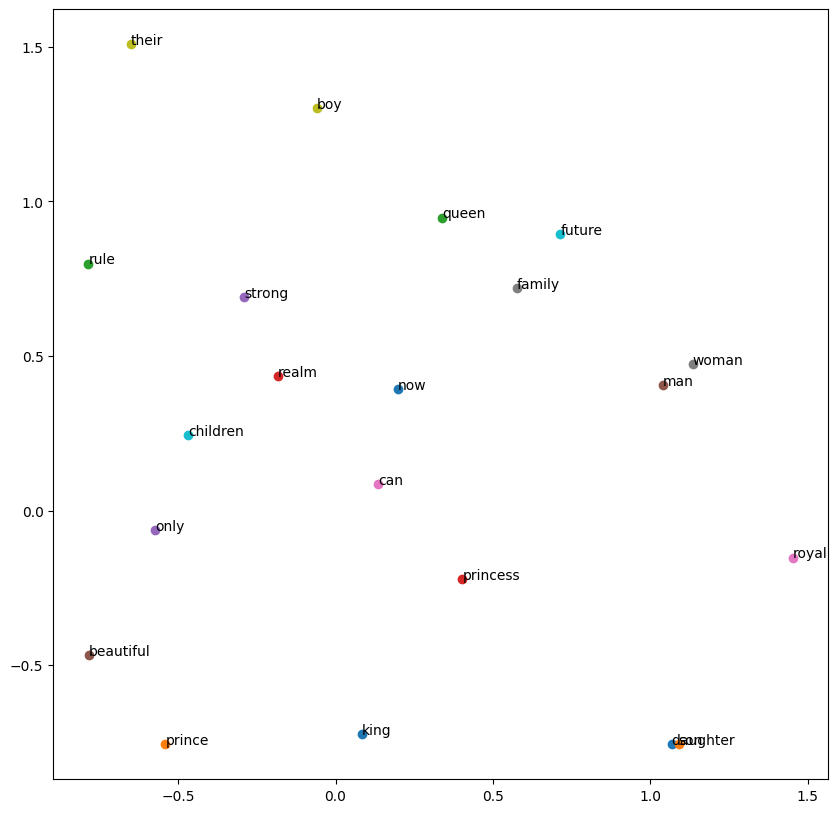

In [71]:
weights = model.get_weights()[0]
embedding_dict = {}
for word in list(tokenizer.word_index.keys()):
    embedding_dict.update({
        word: weights[tokenizer.word_index.get(word) - 1]
    })
plt.figure(figsize=(10, 10))
for word in list(tokenizer.word_index.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
plt.show()